# DSCI 100 Group Proposal

**Research question:** How accurately can we diagnose chest pain (categorised as typical angina, non-typical angina, asymptomatic) for Swiss patients based on their resting heart rate and blood pressure?

## Introduction

Chest pain refers to discomfort in the chest, ranging from feeling an uncomfortable tightness, buildup of pressure, or fullness. In this project, we will be looking into a type of chest pain known as Angina. Angina is a symptom of coronary heart disease that arises from inadequate blood supply to the heart due to abnormal blood pressure and/or heart rate. The chest pain can be categorised into typical and non-typical angina, where typical refers to predictable chest pain that lasts for a maximum of 10 minutes while non-typical relates to unpredictable chest pain that does not follow any pattern. Knowing this, it is important to identify the different types of angina that presents itself in the body to understand the seriousness of the chest pain for prescribing appropriate medication and assessing the severity of the condition, especially to differentiate from potential heart attacks. Thus, our research question that addresses the aforementioned objective is: How accurately can we diagnose chest pain (categorised as typical angina, non-typical angina, and asymptomatic chest pain) for Swiss patients based on their resting heart rate and blood pressure? To address this, we will analyze a dataset containing health records of a specified sample size of Swiss patients, categorizing their chest pain as anginal, non-anginal and asymptomatic chest pain based on observed resting heart rate and blood pressure.

## Preliminary exploratory data analysis

### Reading and wrangling data

After downloading the folder from the archive and storing it in a folder named "data", we read the “processed_switzerland.data” file (read_csv as it uses commas as its separator). We mutate the variable cp (chest pain) as a factor, recode its values to their respective chest pain types, and filter out “non_anginal” as our exploration will not cover them.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [6]:
heart_disease <- read_csv("data/processed.switzerland.data",
                            col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalrest", 
                                          "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
# cp       -> chest pain
# trestbps -> resting blood pressure
# thalach  -> max heart rate achieved
    mutate(cp = as_factor(cp)) |>
    mutate(cp = fct_recode(cp, "typical_angina" = "1", "atypical_angina" = "2", "non_anginal" = "3", "asymptomatic" = "4")) |>
    filter(cp != "non_anginal")
    
heart_disease

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalrest, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalrest,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
32,1,typical_angina,95,0,?,0,127,0,.7,1,?,?,1
34,1,asymptomatic,115,0,?,?,154,0,.2,1,?,?,1
35,1,asymptomatic,?,0,?,0,130,1,?,?,?,7,3
36,1,asymptomatic,110,0,?,0,125,1,1,2,?,6,1
38,0,asymptomatic,105,0,?,0,166,0,2.8,1,?,?,2
38,0,asymptomatic,110,0,0,0,156,0,0,2,?,3,1
38,1,asymptomatic,135,0,?,0,150,0,0,?,?,3,2
38,1,asymptomatic,150,0,?,0,120,1,?,?,?,3,1
40,1,asymptomatic,95,0,?,1,144,0,0,1,?,?,2


### Summarizing data

In [7]:
#splitting the data for later cross-validation
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = cp)
heart_training <- training(heart_disease_split)
heart_testing <- testing(heart_disease_split)

#summarizing training data


### Visualization 

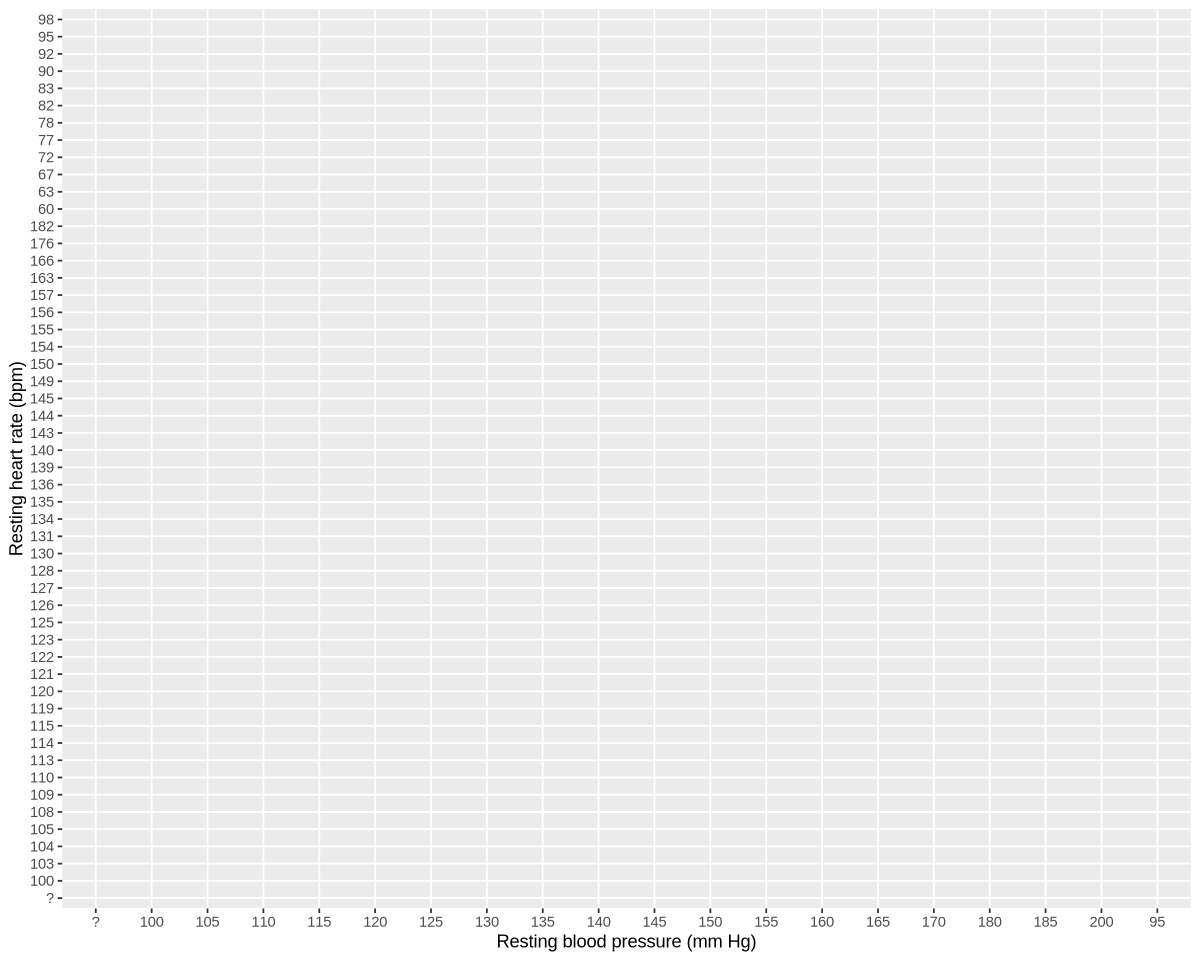

In [15]:
options(repr.plot.width = 10, repr.plot.height = 8)
heart_disease_viz <- heart_training |>
 ggplot(aes(x = trestbps, y = thalrest, colour = cp)) + 
 geom_point() |>
 ggtitle("Resting heart rate vs. resting blood pressure") |>
 theme(text = element_text(size = 14), plot.title = element_text(size = 16, hjust = 0.5)) |>
 labs(x = "Resting blood pressure (mm Hg)", y = "Resting heart rate (bpm)")

heart_disease_viz

## Methods

We will use the k-nn classification to create a model that predicts the type of chest pain (atypical angina, typical angina, or asymptomatic) using two predictors: resting heart rate and blood pressure. We will be tuning our model for the best number of neighbors using the standard tuning procedure and a scatterplot of the number of neighbors against (... stat measure). We will also be applying some statistical measures such as accuracy, recall and precision; and (... plot something)

**Variables:** 

- *Prediction Variable*: Typical angina, non-typical angina, or asymptomatic 
- *Observation Variable 1*: Resting Blood pressure
- *Observation Variable 2*: Resting Heart rate

## Expected outcomes and significance

The ability to diagnose a patient’s chest pain type based on heart rate and blood pressure will be useful for healthcare workers because it can make a person’s physical pain measurable. This ability to properly identify these different types of chest pain an individual has allows healthcare workers to efficiently treat patients. This treatment will be more apparent because the diagnosis can tell us more about the source of the individual’s chest pain, whether it is your heart, lungs, etc. 

*Sources: UpToDate. (2024). Uptodate.com. https://www.uptodate.com/contents/chest-pain-beyond-the-basics. 
 In-text citation: (UpToDate, 2024)*